<a href="https://colab.research.google.com/github/halloweex/data-analysis/blob/master/cancer-project(Breast-Cancer-Wisconsin)/test_cancer0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the libraries
import numpy as np 
# data processing, CSV file I/O
import pandas as pd 
# data visualization library
import seaborn as sns  
import matplotlib.pyplot as plt
import time
#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/model_cancer/breast-cancer-wisconsin.csv')
#link - https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [ ]:
print(df.describe().T)

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

In [ ]:
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df = df.drop(df.columns[[32]], axis=1)

In [ ]:
df = df.rename(columns={'diagnosis': 'label'})
print(df.dtypes)

id                           int64
label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

<Axes: xlabel='label', ylabel='count'>

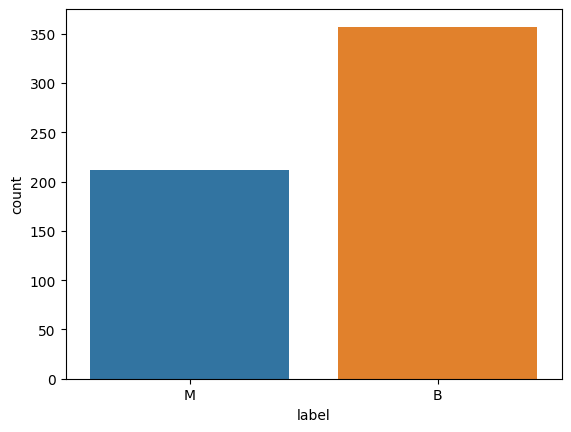

In [ ]:
#Understand the data
sns.countplot(x='label', data=df) 
#M - malignant - 200+
#B - benign - 350+

используем Label encoder

In [ ]:
print("Distribution of data: ", df['label'].value_counts())

Distribution of data:  B    357
M    212
Name: label, dtype: int64


In [ ]:
y = df['label'].values
print("Labels before encoding are: ", np.unique(y))


Labels before encoding are:  ['B' 'M']


In [ ]:
#Encoding categorical data from text (B and M) to integers (0 and 1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0
print("labels after encoding are: ", np.unique(Y))

labels after encoding are:  [0 1]


In [ ]:
#Define x and normalize / scale values

#Define the independent variables. Drop label and ID, and normilize other data
X = df.drop(labels = ["label", "id"], axis=1)
print(X.describe().T) #Needs scaling

                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se             

<Axes: >

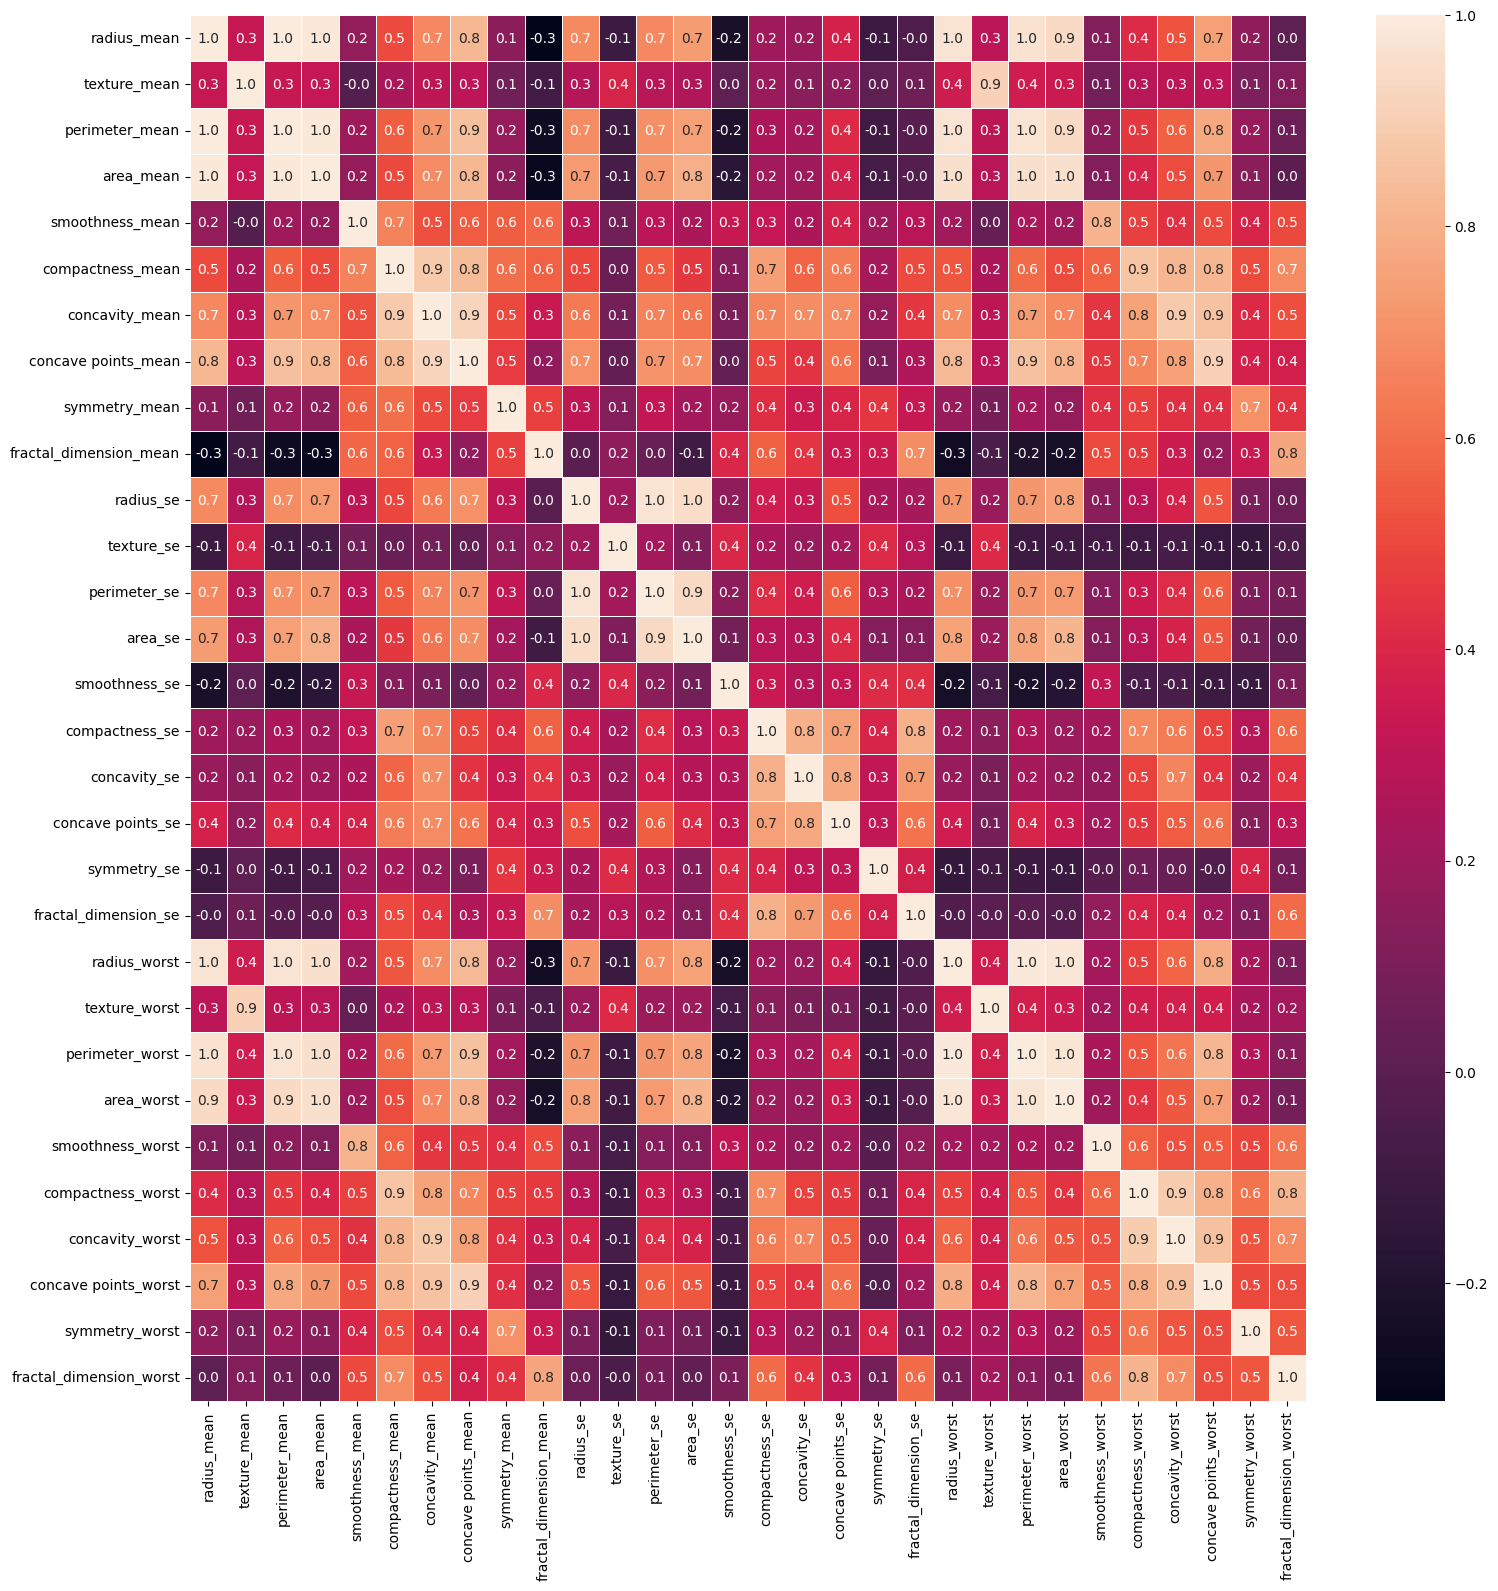

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
X = X.drop(drop_list1,axis = 1 ) 

<Axes: >

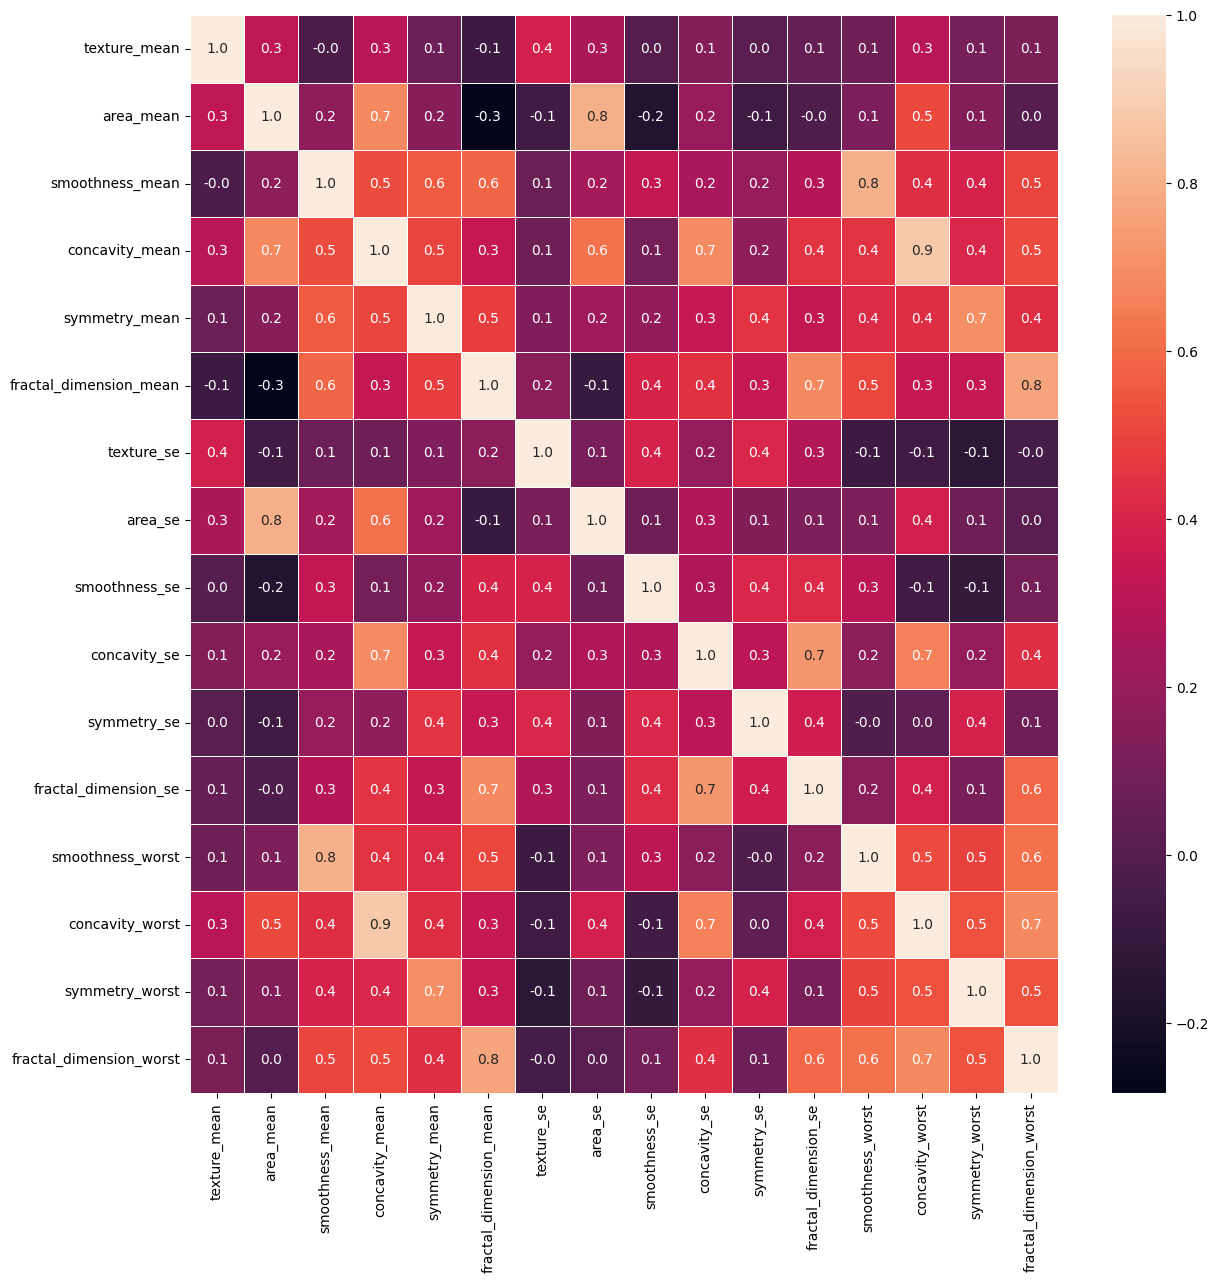

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
#Scale / normalize the values to bring them to similar range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X) #scaled values

[[0.0226581  0.36373277 0.59375282 ... 0.56861022 0.59846245 0.41886396]
 [0.27257355 0.50159067 0.28987993 ... 0.19297125 0.23358959 0.22287813]
 [0.3902604  0.44941676 0.51430893 ... 0.35974441 0.40370589 0.21343303]
 ...
 [0.62123774 0.30311771 0.28816467 ... 0.27180511 0.12872068 0.1519087 ]
 [0.66351031 0.4757158  0.58833619 ... 0.74976038 0.49714173 0.45231536]
 [0.50152181 0.01590668 0.         ... 0.         0.25744136 0.10068215]]


In [ ]:
#Split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42 )
print("Shape of traning data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of traning data is:  (426, 16)
Shape of testing data is:  (143, 16)


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [ ]:
#define the model
model = Sequential()
model.add(Dense(10, input_dim=16, activation='relu'))
model.add(Dropout(0.2))#drop 20% of our connections randomly
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                170       
                                                                 
 dropout_8 (Dropout)         (None, 10)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
 activation_8 (Activation)   (None, 1)                 0         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________
None



> Number of weights = 10 inputs x 16 
units = 160 weights

> Number of biases = 10 (total units in the hidden layer)

> Total parameters = 160 + 10 = 170






In [ ]:
#Fit with no early stopping or other callbacks

history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/100
7/7 [==============================] - 1s 34ms/step - loss: 0.7086 - accuracy: 0.3709 - val_loss: 0.6979 - val_accuracy: 0.3776
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6985 - accuracy: 0.4038 - val_loss: 0.6881 - val_accuracy: 0.3846
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6879 - accuracy: 0.4624 - val_loss: 0.6793 - val_accuracy: 0.4895
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6817 - accuracy: 0.5235 - val_loss: 0.6717 - val_accuracy: 0.6643
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6700 - accuracy: 0.6268 - val_loss: 0.6646 - val_accuracy: 0.7203
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6664 - accuracy: 0.6737 - val_loss: 0.6579 - val_accuracy: 0.7552
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6621 - accuracy: 0.6948 - val_loss: 0.6513 - val_accuracy: 0.7972
Epoch 8/100
7/7 [=========

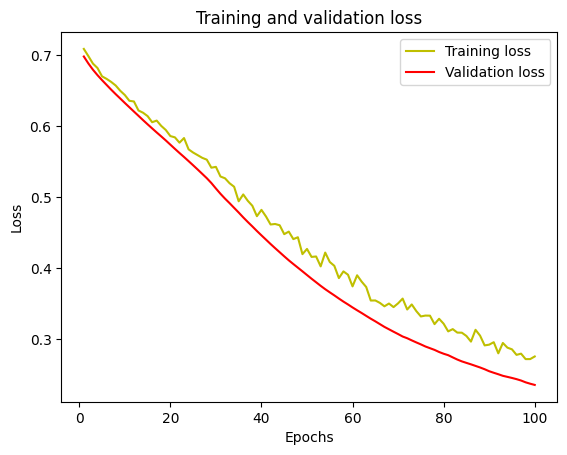

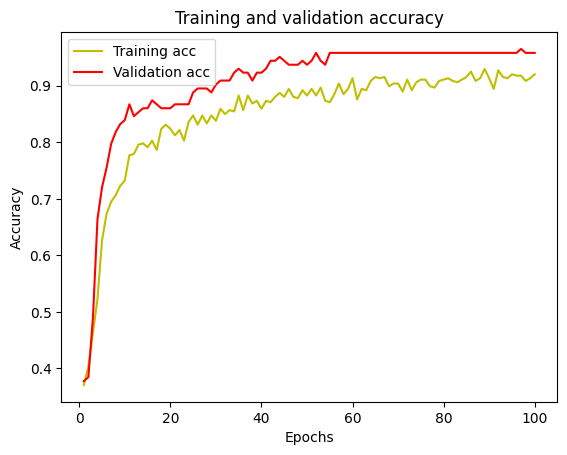

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

5/5 [==============================] - 0s 2ms/step


<Axes: >

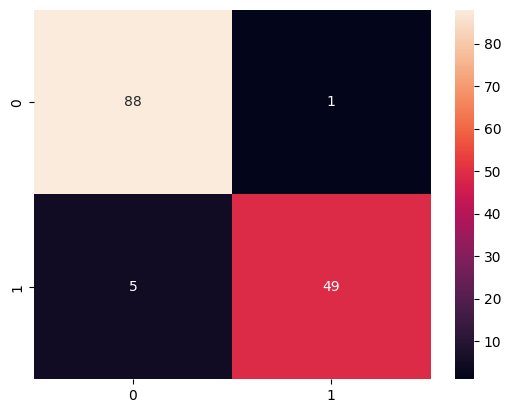

In [ ]:
# Presicting the Test set result
y_pred = model.predict(X_test)
#print(y_pred)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)